#### Steps of the Analysis

1. Reading and Visualising the Data
2. Cleaning the Data 
3. Preparing the Data for Modelling
4. Modelling
5. Final Analysis and Recommendations

#### In clustering we have two types of Algorithms involved which are:
1. K-Means Algorithm
2. Hierarchical Clustering Algorithm 

#### So we will begin our analysis with K-Means Algorithm.

### Step-1 Reading and Visualising the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
help_df=pd.read_csv("P:Country-data.csv")
help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking the shape of the data set
help_df.shape

(167, 10)

In [4]:
# Info of the data set
help_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Step-2 Cleaning the Data Set

#### The above set shows there are no null values present in the data set.

In [5]:
# Additinal check to confirm that there is no presence of missing values
help_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
# Setting country as the index column so that we can use the other numerical columns in the Scaler Method
help_df.set_index('country',inplace=True)
help_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# Data Preparation
help_df['health']=(help_df['health']*help_df['gdpp'])/100
help_df['imports']=(help_df['imports']*help_df['gdpp'])/100
help_df['exports']=(help_df['exports']*help_df['gdpp'])/100
help_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


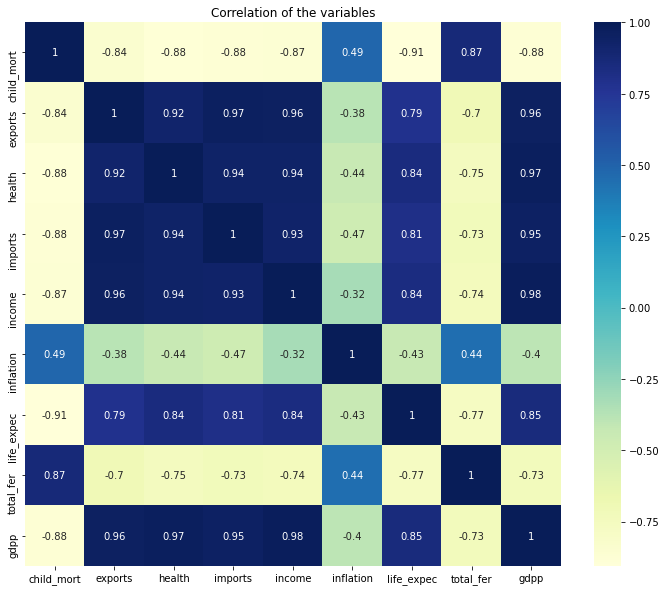

In [8]:
# Heat Map Correlation Analysis.
plt.figure(figsize=(12,10))
plt.title("Correlation of the variables")
sns.heatmap(help_df.corr('spearman'),cmap='YlGnBu',annot=True)
plt.show()

There are certain variables which are highly correlated and will create a problem for us when we do our Modelling process.They will be taken care of before our Modelling Process.

### Step-3 Preparing the Data for Modelling

#### Outlier Analysis 

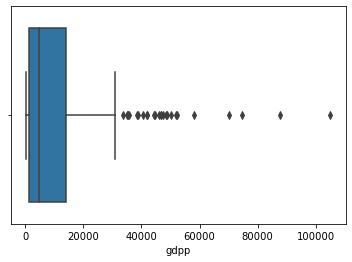

In [9]:
### Plotting the Boxplots to check the Outliers in the GDP
sns.boxplot(help_df['gdpp'])
plt.show()

In [10]:
# Based on GDPP we have these set of countries having the outlier values
help_df[help_df['gdpp']>30000]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900
Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900
Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400
Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400
Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800
Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000
Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200
France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600


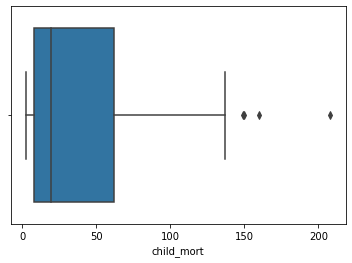

In [11]:
### Plotting the Boxplots to check the Outliers in the Child Mortality
sns.boxplot(help_df['child_mort'])
plt.show()

In [12]:
# Outlier Countries on Child Mortality
help_df[help_df['child_mort']>149]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897
Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662
Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399


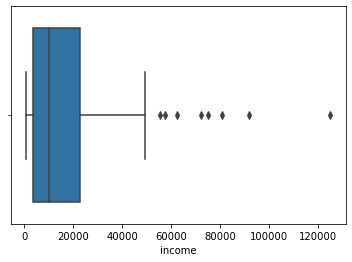

In [13]:
### Plotting the Boxplots to check the Outliers in the Income
sns.boxplot(help_df['income'])
plt.show()

In [14]:
# Outlier countries based on Income
help_df[help_df['income']>50000]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300
Kuwait,10.8,25679.5,1012.55,11704.0,75200,11.200,78.2,2.21,38500
Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000
Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800
Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300
Singapore,2.8,93200.0,1845.36,81084.0,72100,-0.046,82.7,1.15,46600
Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600
United Arab Emirates,8.6,27195.0,1281.00,22260.0,57600,12.500,76.5,1.87,35000


#### Removing the Oultliers from the Box plot by defining the Inter Quartile range

In [15]:
# Outlier Treatment for Child Mortality
Q1=help_df.child_mort.quantile(0.05)
Q3=help_df.child_mort.quantile(0.95)
IQR=Q3-Q1
help_df=help_df[(help_df.child_mort>=Q1-1.5*IQR) & (help_df.child_mort<=Q3+1.5*IQR)]

In [16]:
# Outlier treatment for Imports
Q1=help_df.imports.quantile(0.05)
Q3=help_df.imports.quantile(0.95)
IQR=Q3-Q1
help_df=help_df[(help_df.imports>=Q1-1.5*IQR) & (help_df.imports<=Q3+1.5*IQR)]

In [17]:
# Outlier treatment for Exports
Q1=help_df.exports.quantile(0.05)
Q3=help_df.exports.quantile(0.95)
IQR=Q3-Q1
help_df=help_df[(help_df.exports>=Q1-1.5*IQR) & (help_df.exports<=Q3+1.5*IQR)]

In [18]:
# Outlier treatment for Income
Q1=help_df.income.quantile(0.05)
Q3=help_df.income.quantile(0.95)
IQR=Q3-Q1
help_df=help_df[(help_df.income>=Q1-1.5*IQR) & (help_df.income<=Q3+1.5*IQR)]

In [19]:
# Outlier treatment for GDPP
Q1=help_df.gdpp.quantile(0.05)
Q3=help_df.gdpp.quantile(0.95)
IQR=Q3-Q1
help_df=help_df[(help_df.gdpp>=Q1-1.5*IQR) & (help_df.gdpp<=Q3+1.5*IQR)]

#### Well from the above varibales which I have selected there are outliers present in each one them. So, will be taking care of them as we start working on them.

### Rescaling Process

#### Converting Variables to standard scale

In [20]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [21]:
# Instaniate a Scaler
scaler=StandardScaler()

# Fit_transform
help_scaled=scaler.fit_transform(help_df)
help_scaled=pd.DataFrame(help_scaled)

help_scaled.columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
help_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.272941,-0.615508,-0.560119,-0.646052,-0.889466,0.148905,-1.604262,1.884236,-0.700234
1,-0.552672,-0.494533,-0.429006,-0.419257,-0.364146,-0.317551,0.672719,-0.874942,-0.480962
2,-0.287264,-0.431549,-0.476532,-0.495831,-0.176622,0.776500,0.695376,-0.054467,-0.458025
3,1.987312,-0.377544,-0.526068,-0.480976,-0.618598,1.370171,-1.162460,2.109205,-0.515679
4,-0.708941,-0.005504,-0.157609,0.258488,0.214842,-0.604963,0.729361,-0.557339,0.021806


### Step-4 Modelling Process

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans=KMeans(n_clusters=4,max_iter=50)
kmeans.fit(help_scaled)

KMeans(max_iter=50, n_clusters=4)

In [24]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 3, 2, 1, 1, 2, 2, 2, 3, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       3, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 3, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 3, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 3,
       1, 0, 0, 3, 1, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1,
       1, 0, 0, 1, 1, 2, 2, 0, 2, 3, 3, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

### Selecting the Optimal Cluster

We have 2 methods over here to select the K-Value over here those are:

1. SSD Method
2. Silhouette Analysis

#### A. SSD (Sum of Squared Distances) Method

In [25]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
## Here we will never start the number of clusters with 1 we will begin with 2 and go till 8 not beyond that keeping in mind the professional view point

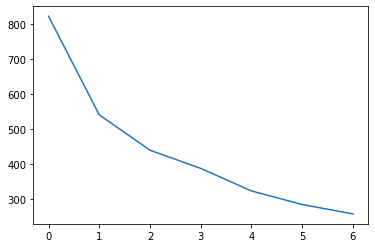

In [26]:
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(help_scaled)
    ssd.append(kmeans.inertia_)

# Plot the SSD for n_clusters

plt.plot(ssd)   

#### Now here the X-axis represents the cluster index and the Y-axis represnts the SSD (Sum of Squared Distances) values

#### By Statistical Way:

 1. When we go from 2 to 3  can see a significant drop in the cluster values but when we from 3 and above we see a drop but that is not very significant.

 2. We see this drop because as we increase the number of clusters we have more centroids and the distance of the points from there closest centroid will be much less.

### B. Silhouette Score Analysis

#### Silhouette Score= (p-q)/max(p,q)

 1. Here p is the mean distance to the points in the nearest cluster that the data point is not a part of
 2. q is the mean intra cluster distance to all the points in its own cluster.
 3. Value lies between -1 to 1

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    
    # Initalise Kmeans
    kmeans.fit(help_scaled)
    cluster_labels=kmeans.labels_
    
    #Silhouette Score
    silhouette_avg=silhouette_score(help_scaled,cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2, the silhouette score is 0.4865848215698112
For n_clusters=3, the silhouette score is 0.4190755997407924
For n_clusters=4, the silhouette score is 0.40815314410325587
For n_clusters=5, the silhouette score is 0.414147693662528
For n_clusters=6, the silhouette score is 0.30959718293695615
For n_clusters=7, the silhouette score is 0.2751017806755593
For n_clusters=8, the silhouette score is 0.28323274636748275


#### From the above scores we can decide on the 3 clusters as that gives us a more relatable view from both the methods observed above.

#### Final Model with K=3

In [29]:
# Kmeans
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(help_scaled)

#Labels
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2,
       1, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [30]:
# Assigning the Labels
help_df['cluster_id']=kmeans.labels_
help_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


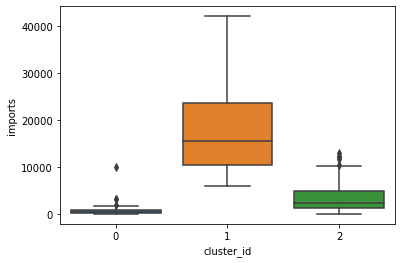

In [65]:
# Box b/w Cluster id and import
sns.boxplot(x='cluster_id',y='imports',data=help_df)
plt.show()

1. The above boxplot describes that Countries which belong to cluster 1 are having high Imports of goods and services as compared to other countries and the cluster they belong too.

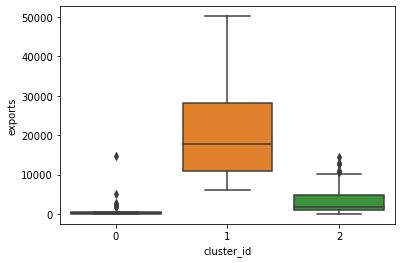

In [66]:
# Boxplot bewteen Cluster Id and exports
sns.boxplot(x='cluster_id',y='exports',data=help_df)
plt.show()

1. The above boxplot describes that Countries which belong to cluster 1 are having high Exports of goods and services as compared to other countries and the cluster they belong too.

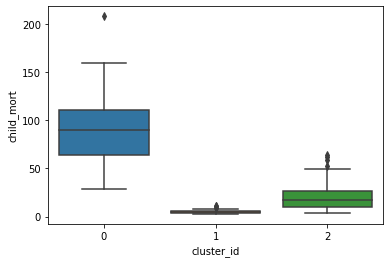

In [67]:
# Boxplot between Cluster Id and Child Mortality
sns.boxplot(x='cluster_id',y='child_mort',data=help_df)
plt.show()

1. Here the Countries which belong to the Cluster 0 have high child mortality rate which means there are more deaths of children which have age under 5years.
2. Mortality rate is  very low for countries which are in the pool of Cluster id 1.

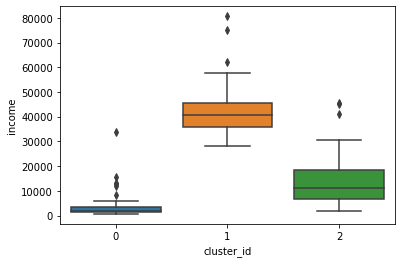

In [34]:
# Box Plot between Cluster Id and Income
sns.boxplot(x='cluster_id',y='income',data=help_df)
plt.show()

1. Countries which belong to cluster 1 have income per person ranging from $ 30000-$ 60000.
2. Countries which belong to cluster 0 have second highest income range from $ 5000-$ 8000.

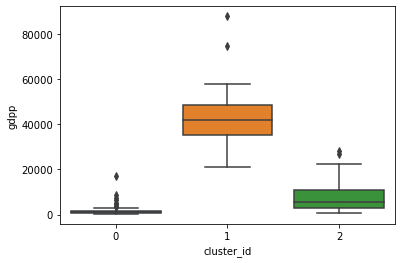

In [35]:
# Boxplot between Cluster ID and GDPP
sns.boxplot(x='cluster_id',y='gdpp',data=help_df)
plt.show()

1. Countries which belong to Cluster 1 have high GDP per capita
2. Countries which belong to Cluster 0 have very low GDP per capita.
3. Countries which belong to Cluster 2 have average gdp range.

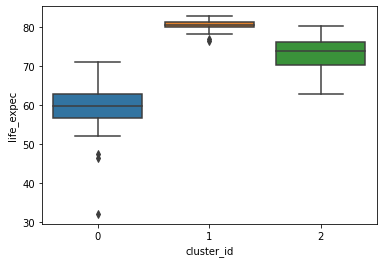

In [68]:
# Boxplot between Cluster ID and Life Expectancy
sns.boxplot(x='cluster_id',y='life_expec',data=help_df)
plt.show()

1. Countries which belong to Cluster id 1 have high life expectancy ranging from 78 years to 85 years.
2. Countries which belong to cluster id 2 have the second best life expectancy ranging from 62 years to 80 years.
3. Countries which belong to cluster id 0 have the lowest life expectnacy ranging from 52 years to 71 years.


### Hierarchical Clustering Algorithm

1. It is an algorithm which groups similar objects into groups called as clusters.
2. This algorithm gives us an inverted tree shaped structure called dendrogram.
3. There are certain steps which we follow in this alogortiyj which are:

A.) Calculate the NxN distance (similarity) matrix, which calculates the distance of each data point from the other

B.) Each item is first assigned to its own cluster, i.e. N clusters are formed

C.) The clusters which are closest to each other are merged to form a single cluster

D.) The same step of computing the distance and merging the closest clusters is repeated till all the points become part of a single cluster.

In [37]:
# Importing the Liabraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Single Linkage

This linkange defines the smallest possible distance between the 2 points in the 2 clusters.

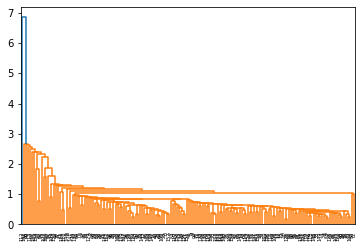

In [38]:
mergings=linkage(help_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

#### Here the results from the above linkage are not at all interpretable. So, that's why we need to switch to complete linkage rather than single linkage.

#### Complete Linkage

This linkage is defined as the maximum distance between any 2 points in the cluster.

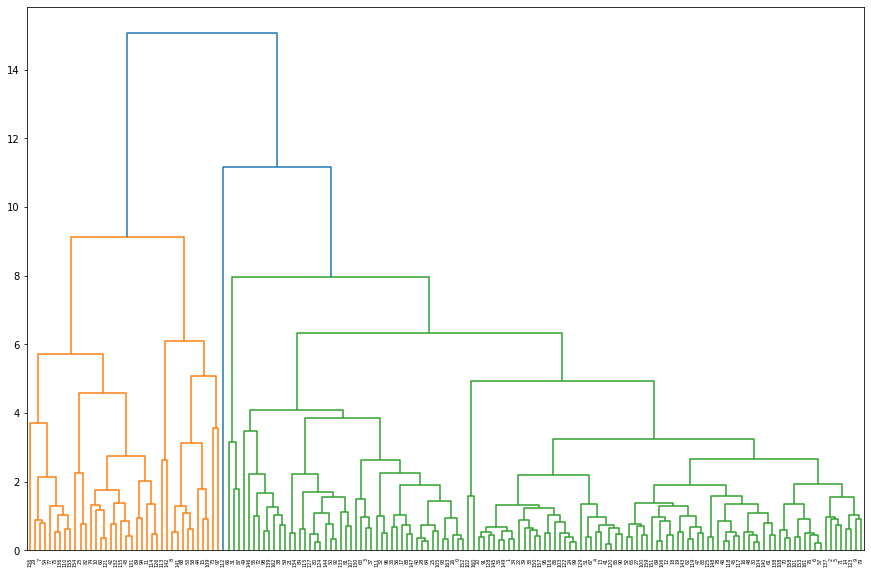

In [39]:
plt.figure(figsize=(15,10))
mergings=linkage(help_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

#### Now the above figure is a proper dendrogram on which we will do the rest of the analysis.

In [40]:
# 3 clusters
cut_tree(mergings,n_clusters=3)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
    

#### This gives the list of an array.

In [41]:
# Shape
cut_tree(mergings,n_clusters=3).shape

(164, 1)

#### We need a numpy series here not an array so we will do reshape command over here.

In [42]:
# cluster labels
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

#### Now the above output gives us a normal numy series.

In [43]:
# Assigning the cluster labels
help_df['cluster_labels']=cluster_labels
help_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0


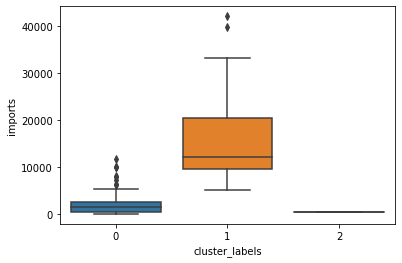

In [69]:
# Plots
# Boxplot between imports and cluster labels
sns.boxplot(x='cluster_labels',y='imports',data=help_df)
plt.show()

1. The above plot clearly describes that the number of imports are much higher for countries which belong to cluster label 1
2. There no imports happening in the  country belonging to cluster 0 are very less.
3. For Country in cluster 2 no. of imports are close to 0.


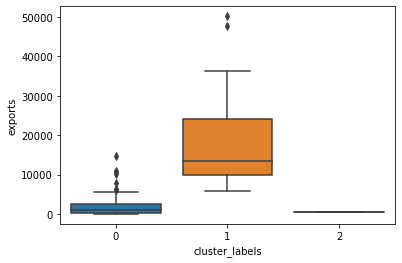

In [70]:
# Boxplot between exports and cluster labels
sns.boxplot(x='cluster_labels',y='exports',data=help_df)
plt.show()

1. The above plot clearly describes that the number of exports are much higher for countries which belong to cluster label 1
2. There no. of exports happening for country belonging to cluster 2 is very close to 0.
3. No. of exports for countries in cluster 0 are very less.

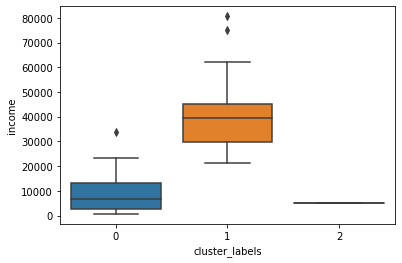

In [82]:
# Boxplot beween income and cluster labels
sns.boxplot(x='cluster_labels',y='income',data=help_df)
plt.show()

1. The income of the person belonging to the country under cluster label one is higher as compared to the ones belonging to 1.
2. People who live countries where cluster label is 2 have an income of around USD 5000.
3. Income of people who belong to clsuter 0 is around 2k to 25k.

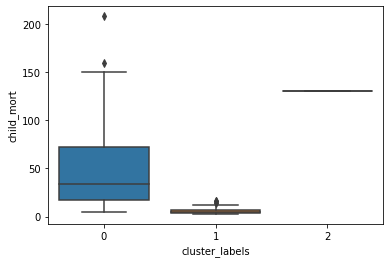

In [71]:
# Boxplot beween Child Mortality and cluster labels
sns.boxplot(x='cluster_labels',y='child_mort',data=help_df)
plt.show()

1. Here the boxplot clearly describes that the countries which are part of cluster label 0 have high child Mortality Rate ranging from just above 0 to 150. There are more number of deaths of children who are below 5 years of age.
2. Country in cluster label 2 is having Child Mortality rate around 148.
3. For countries in cluster label 1 countries have very low child mortality rate.

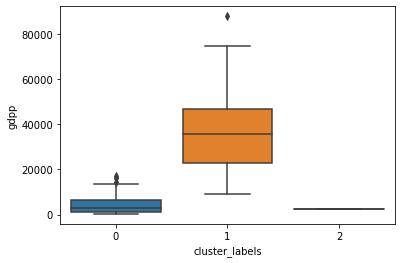

In [72]:
# Box Plot bewteen GDPP and Cluster labels
sns.boxplot(x='cluster_labels',y='gdpp',data=help_df)
plt.show()

1. The above decribes that the countries which belong to cluster label 1 have high high GDP per capita as compared to other clusters.
2. GDP per capaita ranges from 5000 to 18000 USD for cluster label 0.
3. Cluster label 2 has very low GDPP.

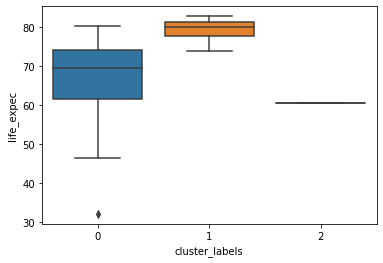

In [73]:
# Box Plot bewteen Life Expectancy and Cluster labels
sns.boxplot(x='cluster_labels',y='life_expec',data=help_df)
plt.show()

1. The above graph shows that the life expectancy of cluster 0 is from 45 to 80 years and 50th percentile is around 70.
2. For cluster 1, life expectancy ranges from 73 to 80+ and the median is around 80.
3. Life Expectancy for cluster 2 is around 61 or 62.

### Bivariate Analysis

#### Scatter plot between different variables

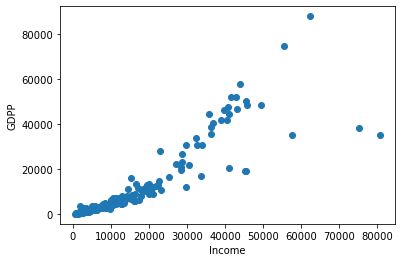

In [50]:
# Scatter Plot between Income and GDPP
plt.scatter(help_df.income,help_df.gdpp)
plt.xlabel("Income")
plt.ylabel("GDPP")
plt.show()

1. This graph clearly shows us that whenever there is a Increase in income of the individual we increase in the GDP per capita.

2. That means people will have more money in their hands as a result theyy have the flexibility to spend more on items which results in increase in the GDP.

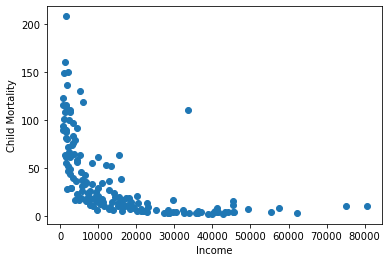

In [51]:
# Scatter Plot between Income and Child Mortality
plt.scatter(help_df.income,help_df.child_mort)
plt.xlabel("Income")
plt.ylabel("Child Mortality")
plt.show()

1. This graph shows us that wherever people have low income there is high child mortality rate becuse they are not earning enough to have proper food for their children.
2. As a result most the children that die are under 5 years of age.
3. Here we can see that there is a spike in the cure at the beginning for individuals who earn less than 10k.

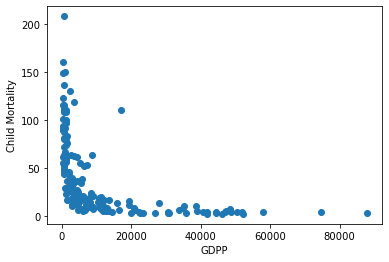

In [52]:
# Scatter Plot between gdpp and Child Mortality
plt.scatter(help_df.gdpp,help_df.child_mort)
plt.xlabel("GDPP")
plt.ylabel("Child Mortality")
plt.show()

1. The above depicts that the countries which have a low GDPP i.e. between 0 and 20000 have high mortalaity rate.
2. As the GDPP increases child mortality rate is almost 0.

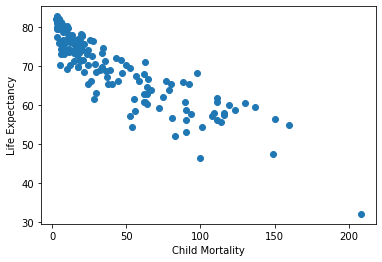

In [53]:
# Scatter Plot between Child Mortalaity and Life Expectancy
plt.scatter(help_df.child_mort,help_df.life_expec)
plt.xlabel("Child Mortality")
plt.ylabel("Life Expectancy")
plt.show()

1. The above graph shows that,  as the child mortality rate increases there is a decraese in life expectancy of the children.
2. Low child mortality rate means less no. of deaths of children aged between 0 and 5 and high life expectancy rate i.e above 80 years.
3. If the child Mortaity rate is around 200 children will have life expectancy around 30 years.

### Final Analysis and Recommendations

#### On K-Means Algorithm

#### Countries and their Cluster-Id Analysis

In [78]:
# Countries belonging to cluster id 0
cluster_id0=help_df[help_df['cluster_id']==0]
cluster_id0.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,0,0
Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0,0
Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,0,0
Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,0,0
Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,0,0


The Above set gives us those countries which belong to the Cluster ID 0:

1. The above countries have very low imports happening around the world.
2. Exports range is also similar to imports. Trade of ratio is almost equal for these countries.
3. Child Mortality Rate for these countries ranges from 2 to 150.
4. Income earned by a person residing in any of these countries is from $ 5000-$ 8000.
5. These countries have very low GDP per capita.
6. These countries have the second best life expectancy ranging from 52 years to 71 years.

In [76]:
# Countries belonging to cluster id 1
cluster_id1=help_df[help_df['cluster_id']==1]
cluster_id1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1,1
Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1,1
Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1,1
Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,1,1
Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1,1


The Above set gives us those countries which belong to the Cluster ID 1:

1. The above countries have very good import and export of goods as comapred to other countries.
2. Child Mortality Rate for these countries is very low not more than 12 or 13.
3. Income earned by a person residing in any of these countries is very good ranging from around 28k to 60k USD.
4. These countries have the best GDP per capita rate.
5. They have the highest life expectnacy rate ranging from 76 years to 80+ years.

In [75]:
# Countries belonging to cluster id 2
cluster_id2=help_df[help_df['cluster_id']==2]
cluster_id2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Albania,16.6,1145.20,267.895,1987.74,9930,4.49,76.3,1.65,4090,2,0
Algeria,27.3,1712.64,185.982,1400.44,12900,16.10,76.5,2.89,4460,2,0
Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100,1.44,76.8,2.13,12200,2,0
Argentina,14.5,1946.70,834.300,1648.00,18700,20.90,75.8,2.37,10300,2,0
Armenia,18.1,669.76,141.680,1458.66,6700,7.77,73.3,1.69,3220,2,0


The Above set gives us those countries which belong to the Cluster ID 2:

1. The above countries have average import and export of goods as comapred to other countries.
2. Child Mortality Rate for these countries is 48 to 150.
3. Income earned by a person residing in any of these countries is average.
4. These countries have an average GDP per capita range.
5. They have life expectancy rate ranging from 65 years to 78 years.

In [77]:
# Number of countries that are in need of aid.
cluster_id0.shape

(48, 11)

### Top 10 countries where help should given 1st based on Imports<1000.

In [80]:
# Top 10 countries based on cluster Id0 that NGO should focus on are:
cntry_df=help_df[(help_df['cluster_id']==0) & (help_df['imports']<1000)]
cntry_df.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0,0
Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0,0
Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0,0
Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0,0
Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0,0
Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0,0
Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0,0
Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,0,0
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0,0


### Hierarchical Clustering Analysis 

#### Countries and their Cluster Label Analysis

### Countries-Cluster Label 0

In [81]:
# Countries belonging to cluster label 0
cluster_label0=help_df[help_df['cluster_labels']==0]
cluster_label0.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,0
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,0


Above we have the countries from cluster label 0 and as depicted from the Sactter Plot and the Box Plot we have certain Analysis on them:

1. These countries are low on import and export of goods. As a result, they have a poor GDP per capita percentage as copmared to the countries in the other cluster.
2. The income earned by individual in the above ranges from 2k to 25k which is not the best in business and needs to be looked upon. This one more reason of having low GDP.
3. The Child Mortality rate in these countries is very high and ranges from 2 to 150.
4. Life Expectancy, for these countries ranges from 45 to 80 years.
5. As seen from the scatter plots and the box plots above, HELP International can focus on these underdeveloped countries.

In [83]:
# Number of countries in this cluster
cluster_label0.shape

(125, 11)

### Top 10 countries where help should be given 1st based on Imports<1000

In [85]:
# Top 10 countries according to HCA are:
# Top 10 countries based on cluster Id0 that NGO should focus on are:
cntry_df1=help_df[(help_df['cluster_labels']==0) & (help_df['imports']<1000)]
cntry_df1.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0,0
Bangladesh,49.4,121.2800,26.6816,165.244,2440,7.140,70.4,2.33,758,2,0
Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0,0
Bolivia,46.6,815.7600,95.8320,679.140,5410,8.780,71.6,3.20,1980,2,0
Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0,0
Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0,0
Cambodia,44.4,425.2260,44.6448,467.670,2520,3.120,66.1,2.88,786,2,0
Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0,0
Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0,0


### Countries-Cluster Label 1

In [63]:
# Countries belonging to cluster label 1
cluster_label1=help_df[help_df['cluster_labels']==1]
cluster_label1.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1,1
Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1,1
Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,2,1
Bahrain,8.6,14386.5,1028.79,10536.3,41100,7.440,76.0,2.16,20700,2,1
Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1,1
Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,1,1
Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1,1
Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,1,1
Czech Republic,3.4,13068.0,1560.24,12454.2,28300,-1.430,77.5,1.51,19800,2,1


Above we have the countries from cluster label 1 and as depicted from the Scatter plot and the Box plot we have ceratin Analysis from them:

1. These countries have high ratio of import and export of goods. If we compare the 2 boxplots in this case we find that range of import and exports is almost similar.
2. Income earned by a person in these countries is very good the range itself starts from 25k and goes till 62k.
3. Now if we see the child mortality rate of these countries it quite obvious that it is very low since people here have fair amount of money in their hand to spend it on the health of the children.
4. This also states that GDP per capita of these countries is also very high it ranges from 10000 to 78000 USD.
5. These are the developed countries and don't require that much attention for any further analysis.

### Country-Cluster Label 2

In [86]:
# Country belonging to cluster label 2
cluster_label2=help_df[help_df['cluster_labels']==2]
cluster_label2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
country,,,,,,,,,,,
Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,0,2


The only country we have in the cluster label 2 is Nigeria which requires a fair amount of attention from the HELP International NGO.

1. Nigeria is having a very bad import to export ratio of goods.
2. Bare minimum income here of the person is 5k.
3. Life Expectancy here of the person is only 60 years.
4. Child Mortality rate here is 130 that means 130 children are expected to die which are below 5 years of age.

### Recommendations

#### 1. K-Means Algorithm

#### There are 48 countries in total which need are in need of aid.

As per the K-Means Algorithm we have found out that the countries which need attention are the ones which belong to Cluster id-2. Some of these countries are:

1. Afghanistan
2. Angola
3. Benin
4. Botswana
5. Cameroon
6. Central African Republic
7. Chad
8. Burkina Faso
9. Comoros
10. Burundi
11. Cameroon
12. Congo, Dem.Rep.
13. Congo,Rep.
14. Cote d'Ivoire
15. Equatorial Guinea
16. Eritrea
17. Gabon
18. Gambia
19. Ghana
20. Guinea

There are 28 more countries which need to be looked upon.

### Out of 48, the 10 countries which require immediate attention are:

1. Afghanistan
2. Benin
3. Burkina Faso
4. Burundi
5. Cameroon
6. Central African Republic
7. Chad
8. Comoros
9. Congo, Dem. Rep.
10. Cote d'Ivoire

#### 2. Hierarchical Clustering Algorithm



#### There are around 126 counries in total which are in need of aid. 15 belong to cluster label 0 and 1 belong to cluster label 2.

As per the K-Means Algorithm we have found out that the countries which need attention are the ones which belong to Cluster label 0 are. Some of these countries are:

1. Afghanistan
2. Albania
3. Algeria
4. Angola
5. Antigua and Barbuda
6. Argentina
7. Armenia
8. Azerbaijan
9. Bangladesh
10. Barbados

There are around 115 more apart from this.

Cluster Label 2:

We have one country in this cluster which is Nigeria. So, that makes it around 126 countries according to HCA.

### Out of 126 countries, the 10 which require the immediate attention are:

1. Afghanistan
2. Bangladesh
3. Benin
4. Bolivia
5. Burkina Faso
6. Burundi
7. Cambodia
8. Cameroon
9. Central African Republic
10. Chad

 Based on both the approaches and the results observed in my opinion we should go ahead with the __K-Means Algorithm Appraoch__ Reason being:

1. This approach is simple enough to carry out this opeartion. HCA technique gave us around 126 countries to focus upon but think that is bit over expressive in terms of analysis. 
2. Although selecting the right K-Value is a bit more challenging in k-means but still it gives the right set of variables and the cluster they belong to.
3. We got those 48 countries from the result which are in dire need of aid from the NGO but we will start with 10 mentioned above 1st.
4. It has given us a cluster which the NGO should focus on .

#### If we improve the Import and Export trade of these countries this will automatically bring a change in their GDPP, Income, Child Mortlaity Rate and the Other factors. Because, when there will be more earning from these things rest of the things will automatically improve. Since, every individual will have more money to spend.